In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df = pd.read_pickle("../../data/interim/data_clustered.pkl")

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,heavy,30,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,1
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,heavy,30,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,90,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,3
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,90,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,0
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,0


In [ ]:
df_train = df.drop(columns=["participant", "set", "category"])

In [ ]:
df_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,bench,-0.306308,-0.170012,-0.020847,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,bench,-0.286807,-0.077810,0.041118,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,bench,-0.324602,-0.068072,0.035701,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,bench,-0.324352,-0.066294,0.036481,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,1
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,bench,-0.295388,-0.080264,0.051910,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,row,0.340833,-0.024316,-0.079494,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,3
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,row,0.429542,-0.180736,-0.050210,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,0
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,row,0.346775,-0.147540,-0.051285,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,0


In [ ]:
X = df_train.drop(columns=["label"])
y = df_train["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:40:18.400,-0.373579,0.887496,-0.337454,-41.339471,-11.883266,13.620020,-0.327663,-0.301799,-0.088788,1.020336,...,0.207547,475.050139,12.034199,-5.025942,38.898166,-65.243969,41.305351,32.316569,2.451360,1
2019-01-14 13:32:23.600,-0.158768,0.856106,-0.094046,13.804269,-6.418352,-19.833937,-0.290925,-0.123764,0.009824,0.875768,...,0.247890,242.838057,14.474823,14.637746,10.221093,-47.089907,11.937577,10.467044,-7.327165,1
2019-01-14 14:01:47.400,0.053345,-0.896271,0.108984,-36.575253,10.717046,27.092595,0.331451,-0.026824,-0.082489,0.904448,...,0.156130,474.407062,12.827875,18.982473,24.228015,64.343136,-30.590027,-8.585934,7.411619,3
2019-01-15 19:04:19.400,0.356972,0.411164,0.949598,-7.283186,-3.651291,-0.741670,-0.069011,0.561923,-0.034378,1.094633,...,0.519633,125.456776,-29.828215,32.095349,-10.527254,13.408222,1.320569,3.116174,4.650535,2
2019-01-12 15:14:58.800,-0.187799,0.998887,-0.195689,-7.567388,-5.768063,12.002705,-0.345499,-0.183057,0.001614,1.035055,...,0.285664,232.362002,-46.960140,-2.749358,30.370907,-11.932374,-6.921469,-5.332271,-9.573455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:51:38.800,0.024525,0.972424,0.074439,-7.036000,1.073847,-7.531534,-0.311495,0.011116,0.039308,0.975578,...,0.188309,375.503190,-6.247541,-35.216833,-22.743846,37.042325,2.401561,26.043243,26.253559,1
2019-01-14 14:01:49.400,0.088310,-1.216023,0.040692,28.617084,-25.638130,-17.844831,0.444031,-0.073681,0.000303,1.219904,...,0.317378,466.449460,13.055965,35.504446,34.722165,97.724946,-53.224827,-8.079268,-14.345493,0
2019-01-12 15:10:16.600,0.023442,0.933103,-0.068642,7.299404,-8.128853,-2.847900,-0.301323,-0.074642,0.081434,0.935918,...,0.256883,217.462242,4.603115,-41.212104,-9.890231,26.263124,-2.987596,5.385565,-8.853150,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 , stratify=y)

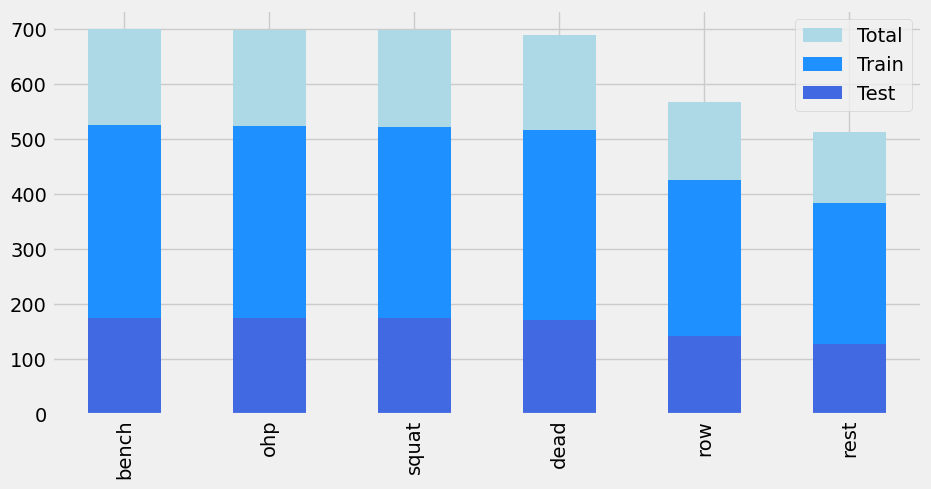

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue",label="Total")
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue",  label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [ ]:
[f for f in df_train.columns if "_temp_" in f]

['acc_x_temp_mean_ws_5',
 'acc_y_temp_mean_ws_5',
 'acc_z_temp_mean_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_z_temp_mean_ws_5',
 'acc_r_temp_mean_ws_5',
 'gyr_r_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_z_temp_std_ws_5',
 'gyr_x_temp_std_ws_5',
 'gyr_y_temp_std_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_r_temp_std_ws_5']

In [ ]:
time_features = [f for f in df_train.columns if "_temp_" in f]

In [ ]:
freq_features = [f for f in df_train.columns if ("_freq_"  in f) or ("_pse" in f)]

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ['acc_r', 'gyr_r']
pca_features = ['pca_1', 'pca_2', 'pca_3']
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if ("_freq"  in f) or ("_pse" in f)]
cluster_features = ['cluster']

In [ ]:
print("len of basic features: ", len(basic_features))
print("len of square features: ", len(square_features))
print("len of pca features: ", len(pca_features))
print("len of time features: ", len(time_features))
print("len of freq features: ", len(freq_features))
print("len of cluster features: ", len(cluster_features))

len of basic features:  6
len of square features:  2
len of pca features:  3
len of time features:  16
len of freq features:  88
len of cluster features:  1


In [ ]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [ ]:
learner = ClassificationAlgorithms()

max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_feature_selection( max_features, X_train, y_train )

AttributeError: 'ClassificationAlgorithms' object has no attribute 'forward_feature_selection'

In [ ]:
learner = ClassificationAlgorithms()

max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection( max_features, X_train, y_train )

0
1
2
3
4
5
6
7
8
9


In [ ]:
selected_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'acc_y_freq_1.071_Hz_ws_14',
 'gyr_x_freq_0.714_Hz_ws_14',
 'acc_z_freq_2.143_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14']

In [ ]:
ordered_scores

[0.885556704584626,
 0.9889693209238194,
 0.9958634953464323,
 0.9975870389520854,
 0.9989658738366081,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693,
 0.9996552912788693]

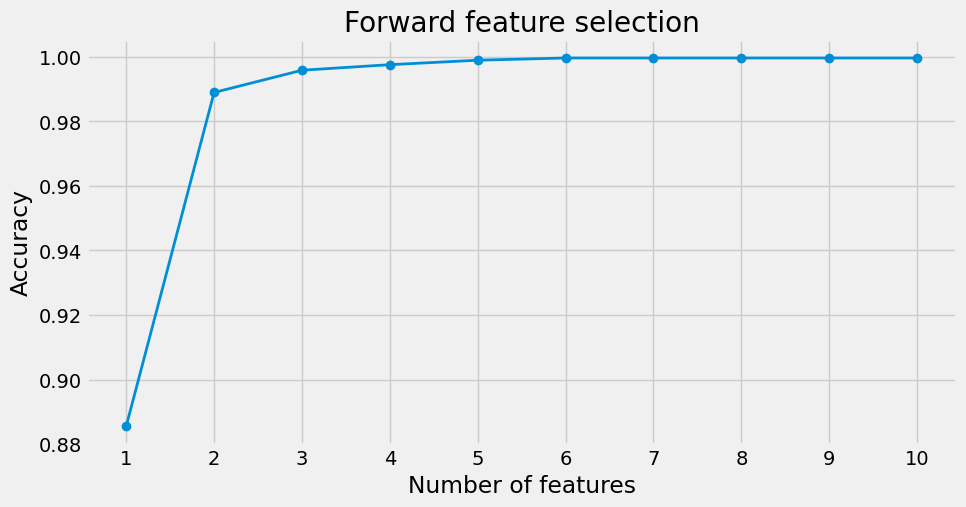

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1,1), ordered_scores, marker="o")
plt.xticks(np.arange(1, max_features + 1,1))
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Forward feature selection")
plt.show()

In [ ]:
selected_features=['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'acc_y_freq_1.071_Hz_ws_14',
 'gyr_x_freq_0.714_Hz_ws_14',
 'acc_z_freq_2.143_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14']

In [ ]:
selected_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'acc_y_freq_1.071_Hz_ws_14',
 'gyr_x_freq_0.714_Hz_ws_14',
 'acc_z_freq_2.143_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14']

In [ ]:
ordered_features

['acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'acc_y_freq_1.071_Hz_ws_14',
 'gyr_x_freq_0.714_Hz_ws_14',
 'acc_z_freq_2.143_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14']

In [ ]:
possible_feature_sets = [feature_set_1, feature_set_2, feature_set_3, feature_set_4 , selected_features]

features_names = ["Feature Set 1", "Feature Set 2", "Feature Set 3", "Feature Set 4", "Selected Features"]

iterations = 1
score_df = pd.DataFrame()

In [ ]:
feature_names = ["Feature Set 1", "Feature Set 2", "Feature Set 3", "Feature Set 4", "Selected Features"]

In [ ]:
possible_feature_sets = [feature_set_1, feature_set_2, feature_set_3, feature_set_4 , selected_features]

feature_names = ["Feature Set 1", "Feature Set 2", "Feature Set 3", "Feature Set 4", "Selected Features"]

iterations = 1
score_df = pd.DataFrame()

In [ ]:
iterations

1

In [ ]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------


# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [ ]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.935884
1,RF,Feature Set 1,0.957601
2,KNN,Feature Set 1,0.792141
3,DT,Feature Set 1,0.929679
4,NB,Feature Set 1,0.854188
0,NN,Feature Set 2,0.937952
1,RF,Feature Set 2,0.960703
2,KNN,Feature Set 2,0.789038
3,DT,Feature Set 2,0.945191
4,NB,Feature Set 2,0.863495


In [ ]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,Feature Set 4,0.996898
0,NN,Feature Set 4,0.995863
1,RF,Selected Features,0.991727
3,DT,Selected Features,0.988625
3,DT,Feature Set 4,0.987590
0,NN,Feature Set 3,0.983454
1,RF,Feature Set 3,0.982420
2,KNN,Feature Set 4,0.972079
4,NB,Feature Set 4,0.962771
0,NN,Selected Features,0.961737


In [ ]:
score_df.to_csv("../../models/model_results.csv", index=False)

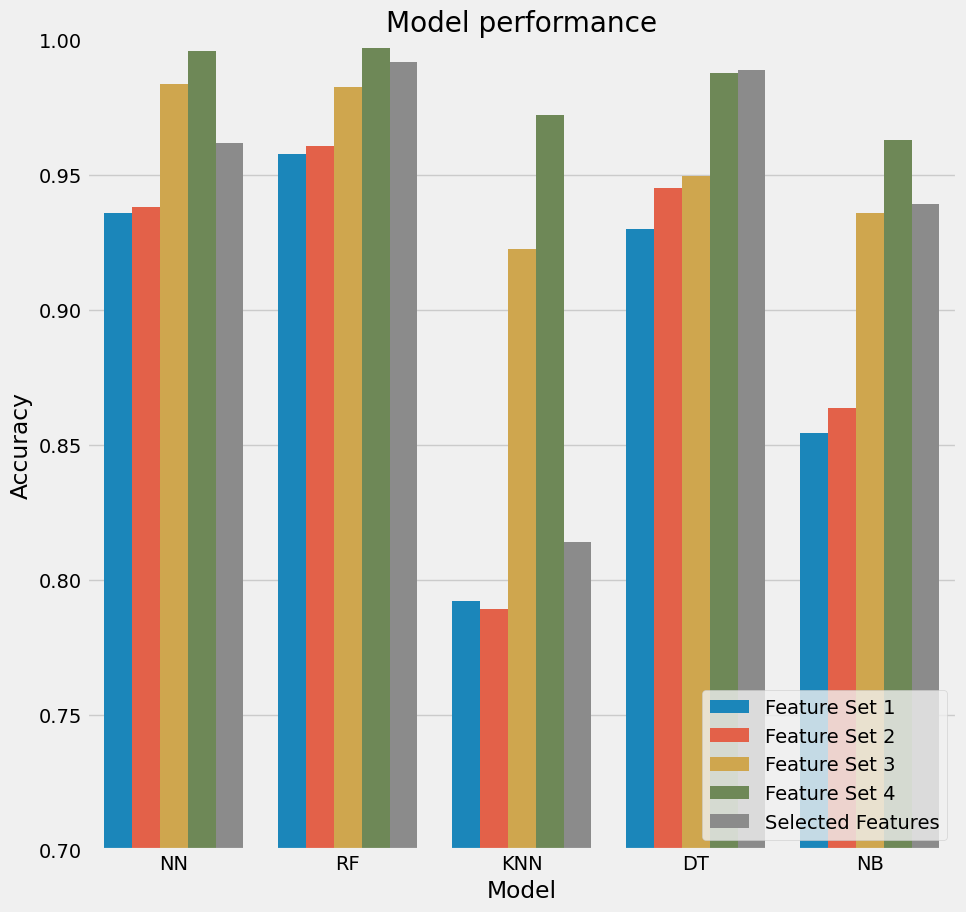

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.title("Model performance")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.savefig("../../reports/figures/model_performance.png")

<Figure size 2000x500 with 0 Axes>

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True)

In [ ]:
accuracy = accuracy_score(y_test, class_test_y)

In [ ]:
accuracy

0.9948293691830403

In [ ]:
classes = class_test_prob_y.columns

In [ ]:
cm = confusion_matrix(y_test, class_test_y, labels=classes)

In [ ]:
cm

array([[173,   0,   2,   0,   0,   0],
       [  0, 171,   0,   0,   1,   0],
       [  0,   0, 175,   0,   0,   0],
       [  0,   0,   0, 128,   0,   0],
       [  0,   2,   0,   0, 140,   0],
       [  0,   0,   0,   0,   0, 175]], dtype=int64)

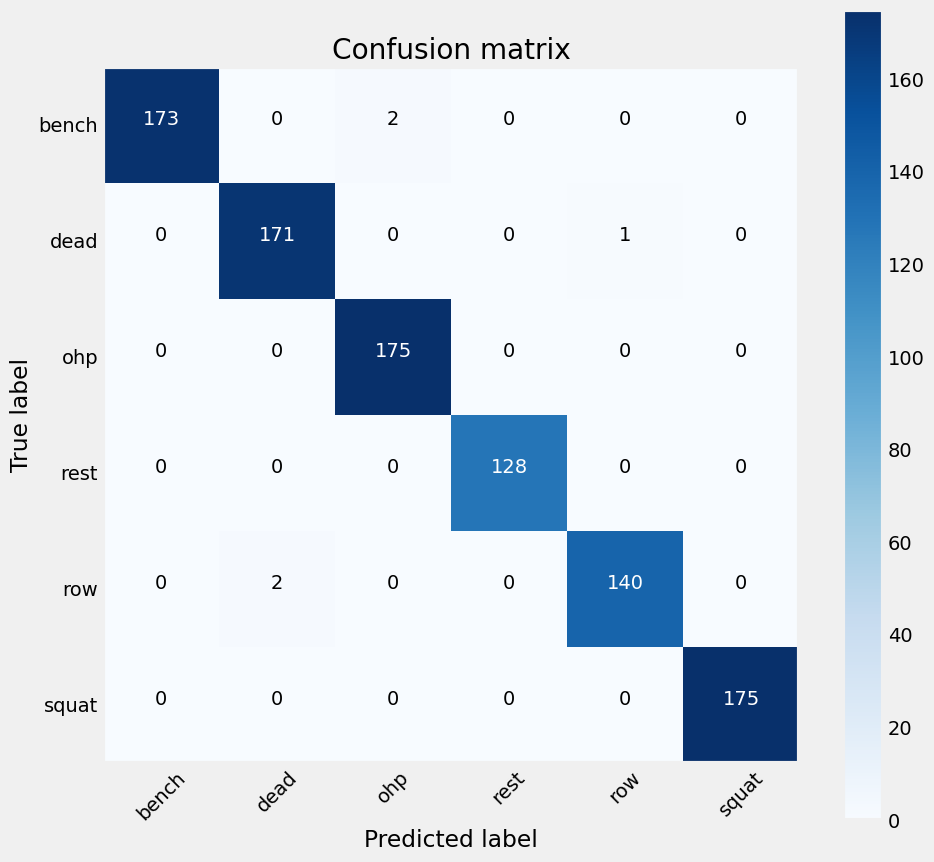

In [ ]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
plt.savefig("../../reports/figures/confusion_matrix.png")

<Figure size 2000x500 with 0 Axes>

In [ ]:
participant_df = df.drop(columns=["set", "category"])

In [ ]:
participant_df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,-0.306308,-0.170012,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,-0.286807,-0.077810,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,-0.324602,-0.068072,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,-0.324352,-0.066294,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,1
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,-0.295388,-0.080264,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,0.340833,-0.024316,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,3
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,0.429542,-0.180736,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,0
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,0.346775,-0.147540,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,0


In [ ]:
X_train = participant_df[participant_df["participant"] != "A"].drop(columns=["label"])
y_train = participant_df[participant_df["participant"] != "A"]["label"]

In [ ]:
X_test = participant_df[participant_df["participant"] == "A"].drop(columns=["label"])
y_test = participant_df[participant_df["participant"] == "A"]["label"]

In [ ]:
y_test

epoch (ms)
2019-01-11 15:10:11.400    bench
2019-01-11 15:10:11.800    bench
2019-01-11 15:10:12.200    bench
2019-01-11 15:10:12.600    bench
2019-01-11 15:10:13.000    bench
                           ...  
2019-01-19 17:26:17.800     rest
2019-01-19 17:26:18.200     rest
2019-01-19 17:26:18.600     rest
2019-01-19 17:26:19.000     rest
2019-01-19 17:26:19.400     rest
Name: label, Length: 1292, dtype: object

In [ ]:
X_test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.400,-0.013910,0.896451,-0.154956,14.160500,-3.186932,-15.474665,A,-0.293872,-0.132897,0.090269,...,0.197581,215.823035,5.668112,-13.015059,12.658350,-15.261431,-27.950194,-14.408091,-5.663977,1
2019-01-11 15:10:11.800,-0.102589,0.861710,-0.211512,6.219879,-12.318853,0.340456,A,-0.291228,-0.182666,0.051236,...,0.155740,225.841089,11.211924,17.460769,-24.589421,9.056748,1.259767,13.263229,6.029432,1
2019-01-11 15:10:12.200,-0.114561,1.194839,-0.165971,-6.228986,-3.458416,-1.834388,A,-0.405589,-0.146274,0.041086,...,0.149058,214.005142,-10.760879,-6.399827,16.040912,-10.679810,18.697746,13.086672,5.692782,1
2019-01-11 15:10:12.600,-0.178058,0.976984,-0.200991,9.032401,6.810420,-13.530446,A,-0.336748,-0.185153,0.025654,...,0.143122,217.959950,-10.494102,-3.138608,7.842907,15.780474,-21.974554,-12.481598,-6.063988,1
2019-01-11 15:10:13.000,-0.170123,0.926899,-0.211001,-15.914028,0.605465,19.830825,A,-0.319912,-0.191122,0.000345,...,0.231660,220.406927,-2.758807,12.149322,-20.069854,-12.083577,6.205158,-25.083899,-26.177866,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-19 17:26:17.800,0.188527,-0.870253,0.454200,18.870754,5.085288,-8.456035,A,0.344208,0.198702,-0.038900,...,0.163063,415.683097,-29.525899,38.996991,-5.174374,-35.708706,-33.342513,0.518818,4.108429,3
2019-01-19 17:26:18.200,0.164850,-0.835022,0.519645,-15.816232,24.202108,-1.831934,A,0.330861,0.235130,-0.096081,...,0.341983,398.995409,-66.464878,76.730129,6.095463,43.658304,0.363577,16.121487,2.541539,3
2019-01-19 17:26:18.600,0.196584,-0.880045,0.509106,-2.928419,26.197246,-24.991792,A,0.349138,0.232734,-0.066181,...,0.165219,417.242222,-26.515407,-28.069037,12.987717,-43.496963,27.408677,-5.870133,-20.315753,3


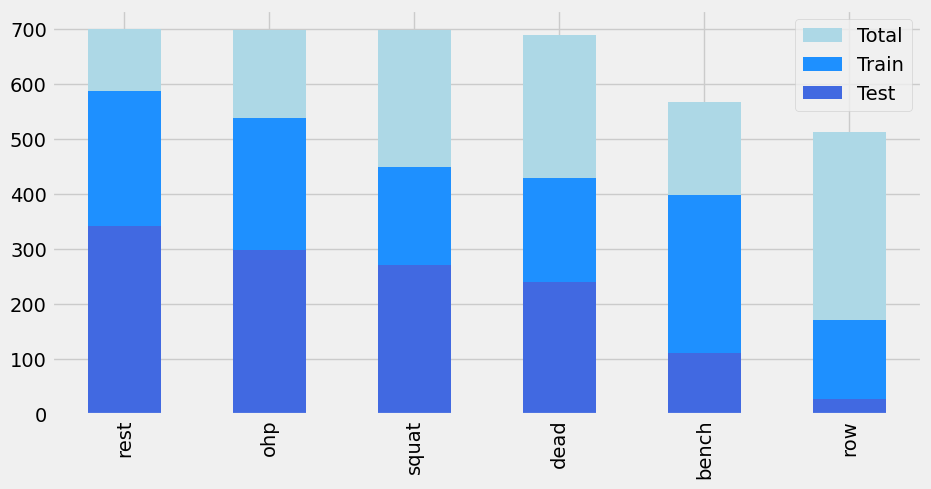

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
participant_df["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

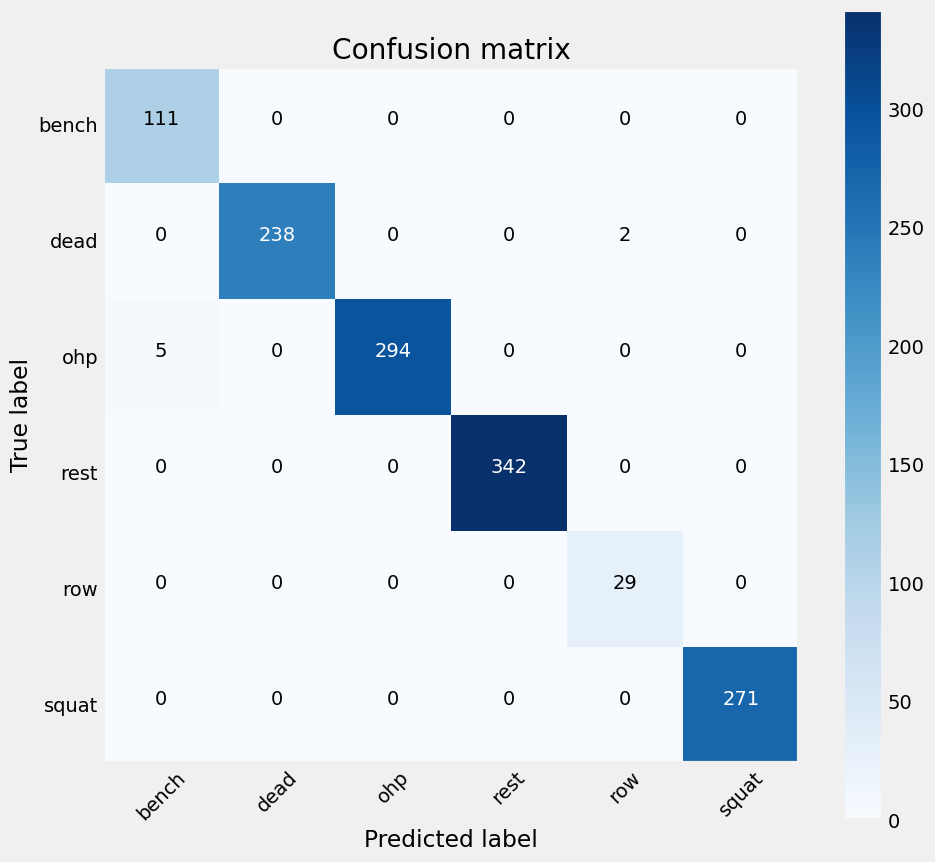

<Figure size 2000x500 with 0 Axes>

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True)

accuracy = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()
plt.savefig("../../reports/figures/confusion_matrix_Participant_A.png")

In [ ]:
accuracy

0.9945820433436533

In [ ]:
with open("../../models/accuracy.txt", "w") as f:
    f.write(str(accuracy))